In [1]:
def fetch_data():
  import os, shutil
  cwd = os.getcwd()
  if os.path.exists("CosmicAI_WinterSchool"):
    shutil.rmtree("CosmicAI_WinterSchool")
  !git clone https://github.com/aliawofford9317/CosmicAI_WinterSchool.git
  for file in os.listdir("CosmicAI_WinterSchool"):
    if file.endswith((".txt",".csv")):
      shutil.copy("CosmicAI_WinterSchool/{}".format(file),cwd)
fetch_data()

Cloning into 'CosmicAI_WinterSchool'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 79 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (79/79), 8.50 MiB | 7.56 MiB/s, done.
Resolving deltas: 100% (21/21), done.


# Individual Exercise 1

1. Using the `olympics` dataset, check if the `Country` column is unique. If it is unique set the column as the new index.

2. Check that the dataset does not contain null values.


3. Sort the countries by `Combined total` medals in descending order. Use `inplace=True`. You can use the `sort_values()` method.



In [7]:
import pandas as pd

In [2]:
%ls

append.txt                 IMDB-Movie-Data.csv   planetary_data.txt
births.csv                 IOT-temp.csv          sample_data/
BL-Flickr-Images-Book.csv  olympics.csv          university_towns.txt
cereal.csv                 planetary_data_2.csv
CosmicAI_WinterSchool/     planetary_data_2.txt


In [5]:
!head olympics.csv

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
,? Summer,01 !,02 !,03 !,Total,? Winter,01 !,02 !,03 !,Total,? Games,01 !,02 !,03 !,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
Austria (AUT),26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
Azerbaijan (AZE),5,6,5,15,26,5,0,0,0,0,10,6,5,15,26


In [9]:
new_names =  {'Unnamed: 0': 'Country',
               '? Summer': 'Summer Olympics',
               '01 !': 'Gold',
               '02 !': 'Silver',
               '03 !': 'Bronze',
               '? Winter': 'Winter Olympics',
               '01 !.1': 'Gold.1',
               '02 !.1': 'Silver.1',
               '03 !.1': 'Bronze.1',
               '? Games': '# Games',
               '01 !.2': 'Gold.2',
               '02 !.2': 'Silver.2',
               '03 !.2': 'Bronze.2'}
df = pd.read_csv('olympics.csv', header=1)
df.rename(columns=new_names, inplace=True)
df.head()

,Country,Summer Olympics,Gold,Silver,Bronze,Total,Winter Olympics,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [10]:
df.set_index("Country", inplace = True)

In [14]:
df.isnull().values.any()

np.False_

In [17]:
df.sort_values("Combined total", ascending=False, inplace=True)

4. Apply the `medal_count` function to the dataframe with `map()` over the `Combined total` column. The function is given in the following code block.

In [ ]:
## USE THIS SPACE TO PASTE YOUR SOLUTIONS FOR THE ABOVE EXERCISE.

In [19]:
def medal_count(item):
    if item >= 100:
        return 'Lots of medals'
    if item < 100:
        return 'Few medals'

In [20]:
df["medal_count"] = df["Combined total"].map(lambda x: medal_count(x))

In [21]:
df

,Summer Olympics,Gold,Silver,Bronze,Total,Winter Olympics,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,medal_count
Country,,,,,,,,,,,,,,,,
Totals,27,4809,4775,5130,14714,22,959,958,948,2865,49,5768,5733,6078,17579,Lots of medals
United States (USA) [P] [Q] [R] [Z],26,976,757,666,2399,22,96,102,84,282,48,1072,859,750,2681,Lots of medals
Soviet Union (URS) [URS],9,395,319,296,1010,9,78,57,59,194,18,473,376,355,1204,Lots of medals
Great Britain (GBR) [GBR] [Z],27,236,272,272,780,22,10,4,12,26,49,246,276,284,806,Lots of medals
Germany (GER) [GER] [Z],15,174,182,217,573,11,78,78,53,209,26,252,260,270,782,Lots of medals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sudan (SUD),11,0,1,0,1,0,0,0,0,0,11,0,1,0,1,Few medals
Togo (TOG),9,0,0,1,1,1,0,0,0,0,10,0,0,1,1,Few medals
Tonga (TGA),8,0,1,0,1,1,0,0,0,0,9,0,1,0,1,Few medals


## Indvidual Exercise 2


1. Combine the `student_data1` and `student_data2` into a single dataframe using the `concat()` method. The dataframes must be joined through the rows axis. Both dataframes are provided below.


In [23]:
# Exercise 1 data
student_data1 = pd.DataFrame({
        'student_id': ['S1', 'S2', 'S3', 'S4', 'S5'],
         'name': ['Danniella Fenton', 'Ryder Storey', 'Bryce Jensen', 'Ed Bernal', 'Kwame Morin'],
        'marks': [200, 210, 190, 222, 199]})

student_data2 = pd.DataFrame({
        'student_id': ['S4', 'S5', 'S6', 'S7', 'S8'],
        'name': ['Scarlette Fisher', 'Carla Williamson', 'Dante Morse', 'Kaiser William', 'Madeeha Preston'],
        'marks': [201, 200, 198, 219, 201]})

In [25]:
pd.concat([student_data1, student_data2], axis=0) # Vertical Concatenation (Stacking Rows) axis = 0, Horizontal Concatenation (Joining Columns) axis = 1

,student_id,name,marks
0,S1,Danniella Fenton,200
1,S2,Ryder Storey,210
2,S3,Bryce Jensen,190
3,S4,Ed Bernal,222
4,S5,Kwame Morin,199
0,S4,Scarlette Fisher,201
1,S5,Carla Williamson,200
2,S6,Dante Morse,198
3,S7,Kaiser William,219
4,S8,Madeeha Preston,201


In [ ]:
# USE THIS SPACE TO PASTE YOUR SOLUTIONS FOR THE ABOVE EXERCISE.

2. Combine the `student_data3` and `student_data4` into a single dataframe using the common name column. The dataframes must be joined by the name column. You can use `merge()` method.


In [26]:
# Exercise 2 data
student_data3 = pd.DataFrame({
        'student_id': ['S1', 'S2', 'S3', 'S4', 'S5'],
         'name': ['Danniella Fenton', 'Ryder Storey', 'Bryce Jensen', 'Ed Bernal', 'Kwame Morin'],
        'marks_test1': [200, 210, 190, 222, 199]})

student_data4 = pd.DataFrame({
        'student_id': ['S1', 'S2', 'S3', 'S4', 'S5'],
        'name': ['Danniella Fenton', 'Ryder Storey', 'Bryce Jensen', 'Ed Bernal', 'Kwame Morin'],
        'marks_test2': [201, 200, 198, 219, 201]})

In [27]:
pd.merge(student_data3, student_data4, on=['student_id', 'name'])

,student_id,name,marks_test1,marks_test2
0,S1,Danniella Fenton,200,201
1,S2,Ryder Storey,210,200
2,S3,Bryce Jensen,190,198
3,S4,Ed Bernal,222,219
4,S5,Kwame Morin,199,201


In [ ]:
# USE THIS SPACE TO PASTE YOUR SOLUTIONS FOR THE ABOVE EXERCISE.

3. Merge `data1` and `data2` using the keys from the left dataframe only. You will need to use a `left` merge for this.

In [28]:
# Exercise 3 data
data1 = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'P': ['P0', 'P1', 'P2', 'P3'],
                     'Q': ['Q0', 'Q1', 'Q2', 'Q3']})
data2 = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'R': ['R0', 'R1', 'R2', 'R3'],
                      'S': ['S0', 'S1', 'S2', 'S3']})

In [29]:
pd.merge(data1, data2, on=['key1', 'key2'], how='left')

,key1,key2,P,Q,R,S
0,K0,K0,P0,Q0,R0,S0
1,K0,K1,P1,Q1,NaN,NaN
2,K1,K0,P2,Q2,R1,S1
3,K1,K0,P2,Q2,R2,S2
4,K2,K1,P3,Q3,NaN,NaN


In [ ]:
# USE THIS SPACE TO PASTE YOUR SOLUTIONS FOR THE ABOVE EXERCISE.

## Individual Exercise 3

- Recreate the following plots. Number 5 and 6 will require your to do the Subplot lesson (6b).

1. <img src='https://www.w3resource.com/w3r_images/matplotlib-basic-exercise-1.png' width=400>

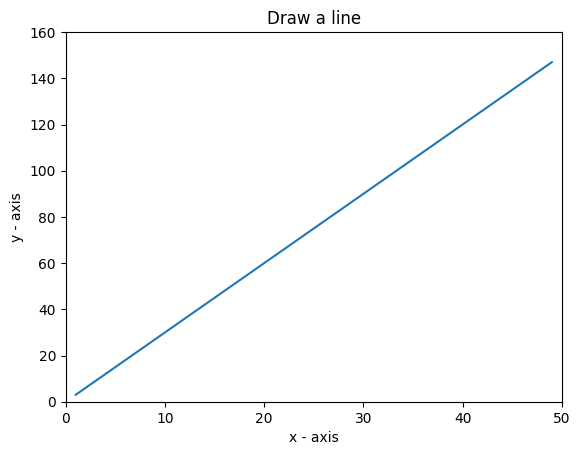

In [56]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
x = np.arange(1,50)
y = 3*x
plt.xlim(0,50)
plt.ylim(0, 160)
plt.title("Draw a line")
plt.xlabel("x - axis")
plt.ylabel("y - axis")
plt.plot(x,y);

In [ ]:
# USE THIS SPACE TO PASTE YOUR SOLUTIONS FOR THE ABOVE EXERCISE.

2. <img src='https://www.w3resource.com/w3r_images/matplotlib-basic-exercise-2.png' width=400>

x axis values
x = [1,2,3]

y axis values
y = [2,4,1]

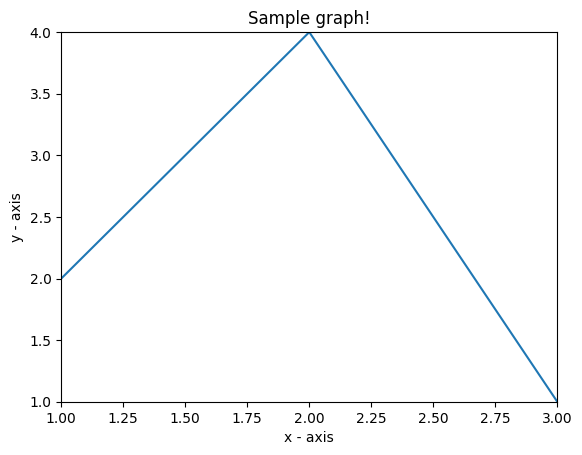

In [60]:
plt.figure()
x = [1,2,3]
y = [2,4,1]
plt.xlim(1.0,3.0)
plt.ylim(1.0, 4.0)
plt.title("Sample graph!")
plt.xlabel("x - axis")
plt.ylabel("y - axis")
plt.plot(x,y);

In [ ]:
# USE THIS SPACE TO PASTE YOUR SOLUTIONS FOR THE ABOVE EXERCISE.

3. <img src='https://www.w3resource.com/w3r_images/matplotlib-basic-exercise-6.png' width=400>

line 1 points
x1 = [10,20,30]
y1 = [20,40,10]

line 2 points
x2 = [10,20,30]
y2 = [40,10,30]

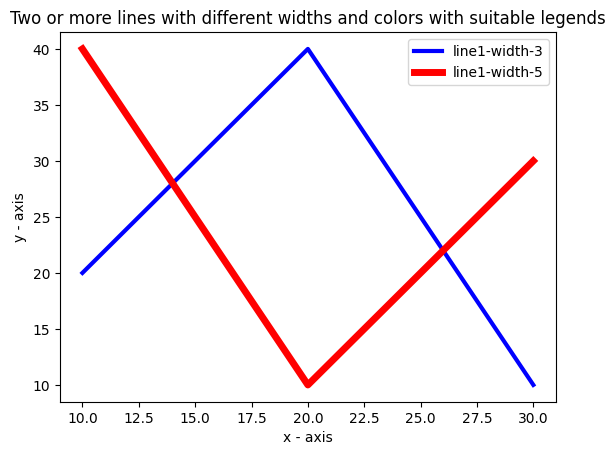

In [66]:
plt.figure()
plt.title("Two or more lines with different widths and colors with suitable legends")
plt.xlabel("x - axis")
plt.ylabel("y - axis")
plt.plot( [10,20,30],[20,40,10], color="blue", linewidth=3, label="line1-width-3");
plt.plot( [10,20,30],[40,10,30], color="red", linewidth=5, label="line1-width-5");
plt.legend();

In [ ]:
# USE THIS SPACE TO PASTE YOUR SOLUTIONS FOR THE ABOVE EXERCISE.

4. <img src='https://www.w3resource.com/w3r_images/matplotlib-basic-exercise-8.png' width=400>

In [ ]:
# USE THIS SPACE TO PASTE YOUR SOLUTIONS FOR THE ABOVE EXERCISE.

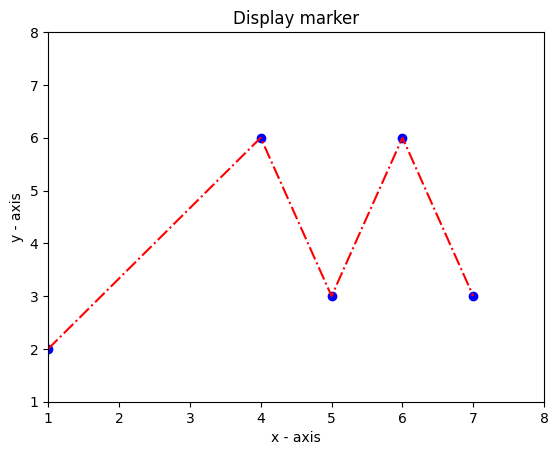

In [73]:
plt.figure()
plt.title("Display marker")
plt.xlabel("x - axis")
plt.ylabel("y - axis")
plt.plot( [1,4,5,6,7],[2,6,3,6,3], color="red", linestyle='-.');
plt.scatter( [1,4,5,6,7],[2,6,3,6,3], color="blue", marker='o');
plt.xlim(1,8)
plt.ylim(1,8);

7. <img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX0AAAEACAYAAABfxaZOAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzt3XecVNX9//HXhyaIiBgDCliwayyIiho1rKLYIsbEAlgB%0Ae8FEjYAaQWNUjH4VjRjBAliCoDFgiSDB1chPgShIFARsNGUNqGBBKfv5/XHucmdxV5bdmblT3s/H%0Ag4fn3r0z9zM+zn72zLmnmLsjIiLFoV7SAYiISPYo6YuIFBElfRGRIqKkLyJSRJT0RUSKiJK+iEgR%0A2WDSN7O2ZjbJzN41s/+aWZ/ofAszm2Bmc8xsvJk1T3lNfzObZ2azzaxLJj+ACICZPWRmZWY2M+Xc%0ARtdRM+tgZjPNbK6Z3Z1yvpGZjYpe87qZbZe9TyeSPjVp6a8BrnT3nwGHAJea2e5AP2Ciu+8GTAL6%0AA5jZnsBpwB7AccAQM7NMBC+S4hHgmPXO1aaO3g/0dvddgV3NrOI9ewOfu/suwN3A7Zn8MCKZssGk%0A7+5L3H1GVP4amA20BU4CRkSXjQB+FZW7AqPcfY27fwzMAzqmOW6RStz9NeCL9U5vVB01s62BZu4+%0ALbpuZMprUt/rKaBz2j+ESBZsVJ++me0AtAfeAFq5exmEPwxAy+iyNsDClJctjs6JZFvLjayjbYBF%0AKecXEdfdda9x97XAl2a2ZeZCF8mMGid9M9uM0MK5Imrxr79+g9ZzkFyXzjqqLkvJSw1qcpGZNSAk%0A/EfdfWx0uszMWrl7WfS1+LPo/GJg25SXt43Orf+e+iMhGZFatzayjv5Y3a342SdmVh/Y3N0/39D9%0ARTLB3Wvd6KhpS/9hYJa7D045Nw44NyqfA4xNOd8tGu3QDtgZmFrVm7p7Iv8GDBhQVPctls/co8dH%0AtGy5F6tWheNIjeuohy6g5WbWMXqwe/Z6rzknKp9KeDBcrUL/f50r9y7Gz1xXG2zpm9mhwBnAf81s%0AOuEr8rXAIGC0mfUC5hNGQ+Dus8xsNDALWA1c4umIVORHlJT04JVXSoFlNG26HXfffWPFj47eyDp6%0AKTAcaAy84O4vRucfAh41s3nAMqBb5j+VSGTYMJg+Hbp3r/NbbTDpu/tkoH41Pz6qmtfcCtxah7hE%0Aauybb2Du3CfWHZ98MlxyCVx6aS/cfaPqqLu/Cexdxfnvif5oiGTdX/8Kb70F999f57cqyhm5JSUl%0ARXXfJO+djfs2bRp+F1q2hFat4L77Mn7LnKT6VaD3njs3JHyARo3q/HaWVM+LmanXR9Jq6VL44AM4%0A6KBwbGZ4HR541ZbqtqTVTTfBgAGhfNJJ2NixdarXRdnSl8K01VZxwhcpCO7wt7/Fx2no01dLXwqW%0AWvqS995+G9q3D+WmTaGsDNtsM7X0pfh89VXSEYhkQWorv2vXkPjrSElf8s78+dCuHfzpT7BmTdLR%0AiGRIeXnau3ZA3TuSZ8rL4eijYVI0Nap7d3jiiaqvVfeO5LXJk+Gww0K5RQtYsgQaNapzvVZLX/LK%0AfffFCb9ePbj88mTjEcmY1NbMKaekZbgmKOlLHpk7F/r2jY+vuQYOOSS5eEQyZvVqGDMmPu7RI21v%0AraQveaNPH1i5MpT33hsGDkw0HJHMmTgR/ve/UG7dGg4/PG1vraQveWPoUOjcGRo2hJEjYZNNko5I%0AJENSu3a6d4f61a2Es/H0IFfySnl5mJF+wAEbvlYPciUvffttWFPkm2/C8ZtvQocO636sB7lSVOrV%0Aq1nCF8lb48bFCX/33WG//dL69kr6IiK55PHH43KPHmDp/bKq7h3JWUuWhFUza1vn1b0jeWfpUthm%0Am3jW4fvvw047VbpE3TtSkL79Fjp1gmOOgYULN3y9SEEYPTpO+Icc8oOEnw5K+pKTrr02jMt/6SX4%0A+c9h1aqkIxLJgtSunTPOyMgt1L0jOae0FI44Ij4eNgzOO2/j30fdO5JXPvwwbtk3aACffAI//ekP%0ALlP3jhSUFSvg3HPj4+OPh969EwtHJHseeywuH3tslQk/HZT0Jafcc09YRRPCGlPDhqV98IJI7nGv%0AnPTPPDNjt9rgxugi2dS3b6j/N90UFldr3TrpiESyYOpUmDcvlJs1C2vnZ4iSvuSUhg3hD38Iz7Da%0AtUs6GpEsefTRuHzKKdCkScZupQe5UrD0IFfywqpV4SvtsmXheNKkyiMZ1qMHuSIi+eyf/4wT/rbb%0AhgkqGaSkL4n67LMwCVGkaKV27Zx5ZlhgKoOU9CUx7mE45l57wbPPJh2NSAK++KJy5T/rrIzfUklf%0AEjN8ODz3HJSVhcEKs2cnHZFIlj35ZDzdfP/9YY89Mn5LJX1JxPz5cMUV8fHll2elvovklpEj4/I5%0A52Tllhq9I1lXXg5HHQUvvxyOd9kFZsyATTdN7300ekdy2rx5sOuuodygAXz6KWy11QZfptE7knde%0Aey2srwPhmdWIEelP+CI5L7WVf8IJNUr46aCkL1nlHvZ4njQJdtgBrrkmrCArUlTKyysn/bPPztqt%0A1b0jifnqK2jUKHMbnKt7R3LWpEnQuXMob7llWFGzhr8Ida3XWoZBEtOsWdIRiCRkxIi43KNH5lo+%0AVVBLXwqWWvqSk77+GrbeOt78fNo0OOCAGr9cD3Il561aBVOmJB2FSI4YMyZO+HvuGcbnZ5GSvmTc%0ATTeFh7VXXw3ffZd0NCIJGz48LvfsmfUNI5T0JaOmTIFbbw2jdu68E554IvsxmNnvzOwdM5tpZo+b%0AWSMza2FmE8xsjpmNN7PmKdf3N7N5ZjbbzLqknO8QvcdcM7s7+59E8t4HH8Crr4Zy/foZ3SylOkr6%0AkjHffhsmGZaXh+OSkspbIWaDmbUGLgc6uPs+hMEL3YF+wER33w2YBPSPrt8TOA3YAzgOGGK2ril2%0AP9Db3XcFdjWzY7L6YST/pT7APe640LefZUr6kjHXXgtz5oTyZpvBI49kfAHB6tQHmppZA6AJsBg4%0ACaj4DRwB/CoqdwVGufsad/8YmAd0NLOtgWbuPi26bmTKa0Q2bO3ayl072W4BRZT0JSOWLw9rSVW4%0A664wGSvb3P0T4E5gASHZL3f3iUArdy+LrlkCtIxe0gZYmPIWi6NzbYBFKecXRedEambSJFgYVa2t%0AtoITT0wkDI3Tl4xo3hxmzoSLLw4Pb3v3TiYOM9uC0KrfHlgOjDGzM4D1x1SmdYzlwIED15VLSkoo%0AKSlJ59tLPnr44bh8xhlhZmINlJaWUlqxbkkaaJy+ZJR7SPoZ3PKzWlFX/KnAMe5+fnTuLOBg4Eig%0AxN3Loq6bl919DzPrB7i7D4qufxEYAMyvuCY63w3o5O4XV3Ff1W2p7IsvYJtt4Pvvw/GMGbDvvrV6%0AK43Tl5xmlkzCT7EAONjMGkcPZDsDs4BxwLnRNecAY6PyOKBbNMKnHbAzMDXqAlpuZh2j9zk75TUi%0AP+6JJ+KE36FDrRN+Oqh7Rwqau081s6eA6cDq6L9DgWbAaDPrRWjFnxZdP8vMRhP+MKwGLklptl8K%0ADAcaAy+4+4vZ/CySx1K7dpLq64yoe0fS5u9/DztgNciRpoSWYZCcMGMG7LdfKG+ySVg3v0WLWr+d%0AunckJ4weDb/5DRx2WDxMU0SAhx6Ky7/5TZ0SfjqopS91tmQJ/Oxn8Pnn4fiCC+CBB5KNCdTSlxyw%0AciW0bg1ffhmOJ06Ml1SupYy39M3sITMrM7OZKecGmNkiM3sr+ndsys+qnMIuhckdzj8/Tvjbbgu3%0A355sTCI545ln4oTfrh0ccUSy8VCz7p1HgKqmm/+fu3eI/r0IYGZ7UP0UdilAw4fDc89VPm7evLqr%0ARYrMgw/G5d69E5uSnmqDEbj7a8AXVfyoqmR+ElVMYa9ThJLTnn02Ll9+ORx5ZHKxiOSUDz6Al18O%0A5Xr1Elt2YX11+bNzmZnNMLMHU1YorG4KuxSop56Ce++F9u3httuSjkYkh6S28o87DtrkRiqs7eC6%0AIcBN7u5mdjNhbZPzNvZNNFU9/9WrB5ddFpZbqF8/2VjSPV1dpNZWrw4rDFY4//zkYllPjUbvmNn2%0AwLPR0rTV/qy6Kezu/oN9kzTCQTJNo3ckMc88A7/+dShvsw0sWJC2CSzZGqdvpPThR2uVVPg18E5U%0ArnIKe22DExHJS8OGxeWePXNnxiI16N4xsyeAEuAnZraAsPjUEWbWHigHPgYuhA1OYZcCMGZM2Pqw%0AbdukIxHJUQsWwIspK3QkvOzC+jQ5S2ps5kw44ADYdNPw8PbMM7O+vedGUfeOJGLAgLAxNECXLjB+%0AfFrfXsswSFasWgVnnx2eTy1fDn/5S7wNoohE1qypvOzCBRckF0s1lPSlRm68Ed5+O5QbNw5bfSY9%0AWkck5zz/PCxeHMqtWoUVCHOMkr5s0JQplcfg33Yb7L57cvGI5KzURafOPRcaNkwslOoo6csGzZgR%0Azx4vKQkzb0VkPR9/XPkBbg527YCSvtTAhReG1v4hh4T5JjmwfIhI7nnwwbACIcAxx8COOyYbTzU0%0AekdqzD23R+usT6N3JGtWrYLttoOysnD897/DySdn5FYavSNZkW8JXySrxo6NE37r1nDiicnG8yOU%0A9GWD1GgV2YD774/L55+fUzNw16fuHfmBl14K31ZPOCEc52srX907khVz5sTD2erXDw90MzhlXd07%0AklbLloVJWL/8ZZg9vmJF0hGJ5LjUVv6JJ+b8GiVK+lLJZZeFPW8hzDNZtSo/W/kiWfHNN2G7uAqX%0AXJJYKDWlpC/rjB4No0bFx8OGwVZbJRePSM4bNSqsSwKw88513vQ8G5T0BQit+9RGSs+eOT0AQSR5%0A7nDfffHxxRfnxSSW3I9QsuKTT2CzzUJ5u+3grruSjUck573xBkyfHsqNG+fMHrgboqQvAHToEJZO%0A7t0bHn4Ymjff8GtEilpqK79HD9hyy+Ri2QgasikFS0M2JWM++wy23TaMdAB4883QcsoCDdkUEcm2%0AYcPihH/wwVlL+OmgpC8isjFWr648Nv+yy5KLpRaU9IvU3LnQrx98913SkYjkmbFj441SWraEU05J%0ANp6NpKRfhNasgXPOgUGDYP/94x2xRKQG7r03Ll94IWyySXKx1IKSfhG6444w2gxg3jwtqCZSY2+/%0ADa++Gsr164ekn2eU9IvMzJlwww3x8YAB0L59cvGI5JXUVv4pp0CbNsnFUksasllEVq2Cjh3j7pyD%0ADoLXXsvpVWDrREM2Ja2WLQuLqVU8CJs8GX7+86yHoSGbUmMrV8JOO4Vy48YwYkThJnyRtBs6NE74%0A++8f9g/NQ0r6RaR5c3jqKXj0URg8GHbbLemIssPMmpvZGDObbWbvmtlBZtbCzCaY2RwzG29mzVOu%0A729m86Lru6Sc72BmM81srpndncynkUSsXl15Bm6fPnm7/Ky6d6RgVXwNNrPhwCvu/oiZNQCaAtcC%0Ay9z9djPrC7Rw935mtifwOHAg0BaYCOzi4Y2mAJe5+zQzewEY7O7jq7iv6nahefJJ6NYtlFu1gvnz%0AExu1o+4dkR9hZpsDh7v7IwDuvsbdlwMnASOiy0YAv4rKXYFR0XUfA/OAjma2NdDM3adF141MeY0U%0AusGD4/JFF+XdMM1USvpS6NoBS83sETN7y8yGmtmmQCt3LwNw9yVAy+j6NsDClNcvjs61ARalnF8U%0AnZNCN2UKvP56KDdqFJJ+HlPSL2ArVsBpp4XZt0WsAdABuM/dOwDfAP2A9ftf1B8jVUtdZ7x7d9h6%0A6+RiSQON3ShgV14JY8bAc8+F4cW9eycdUSIWAQvd/T/R8dOEpF9mZq3cvSzquvks+vliYNuU17eN%0AzlV3vkoDBw5cVy4pKaGkpKRun0KSsXBhGP1Q4be/zXoIpaWllJaWpu399CC3QD3/fNjcvMLf/hY/%0AhyoWKQ9yXwHOd/e5ZjYA2DS65HN3H1TNg9yDCN03LxE/yH0D6ANMA54H7nH3F6u4r+p2objmGvjz%0An0O5pARefjnRcKDuD3KV9AvQsmWw117xBuennhoGH+TpCLNaS0n6+wIPAg2BD4GeQH1gNKH1Ph84%0Azd2/jF7XH+gNrAaucPcJ0fn9geFAY+AFd7+imvuqbheCr78Ok7Eq9sAdOxa6dk02JpT0pQrdu8cb%0AnLdqBe+8U5wbnGtGrtTJvfeG8fgAu+wC772XE3vgasimVOIeJgo2bhyOhw0rzoQvUidr18LdKfPv%0Afve7nEj46aCWfoGaMwf+8Q/o2zfpSJKjlr7U2tNPx+vkb7klLFgATZsmG1NE3Tsi1VDSl1qp+Lo8%0AZUo4vv56+OMfk40phZK+SDWU9KVWJk+Gww4L5UaNwpILOTQ2X336IiLpVDFEE+DMM3Mq4aeDkn6e%0AKy8PXY+PPaYdsETqbM4cGDcuPr766uRiyRAl/Tx3333hmdNZZ8Hpp4c/AiJSS3feGbeefvlL2GOP%0AZOPJACX9PDZ3buXROTvuWDCjykSyb8mSsLNQhd//PrlYMkgpIk+tWQPnnBN2wwLYe2+48cZkYxLJ%0Aa4MHhz1FIewrevjhycaTIUr6eeqOO+CNN0K5YUMYOTKvl/gWSdaKFXD//fFx374Fu26Jkn6eOvpo%0A2HPPUB4wANq3TzYekbz2wAPxGju77gonnZRsPBmkcfp57LvvQl299FJtcF4VjdOXGvnuO2jXLl6h%0AcNgwOO+8ZGP6EZqcJVINJX2pkWHD4IILQrl1a/jww5zuK9XkLBGR2lq7Fm6/PT6+8sqcTvjpsMGk%0Ab2YPmVmZmc1MOdfCzCaY2RwzG29mzVN+1t/M5pnZbDPrkqnAi43G34tkwJgx8P77obzFFnGLv4DV%0ApKX/CHDMeuf6ARPdfTdgEtAfINp16DRgD+A4YIhZgT4Cz7KrroLzz4evvko6EpEC4Q633BIf9+kD%0AzZolF0+W1KhP38y2B551932i4/eATin7i5a6++5m1g9wdx8UXfdPYKC7T6niPdXvWUMvvwxHHhnK%0AO+wA/+//wTbbJBpSXlCfvvyo556DE08M5aZNw8JqP/lJsjHVQFJ9+i3dvQzA3ZcALaPzbYCFKdct%0Ajs5JLa1YAT17xsd77llw6z+JZJ873HxzfHzhhXmR8NMhXQP9atWsGThw4LpySUkJJSUlaQqncFx1%0AVWiAALRoEQYaqMOsaqWlpZSWliYdhuSDf/0rXi+/UaPwi1Ykatu9MxsoSeneednd96iie+dFYIC6%0Ad2pn/Hg49tj4+Iknwv63UjPq3pFqlZTAK6+E8sUXw5AhiYazMbLVvWPRvwrjgHOj8jnA2JTz3cys%0AkZm1A3YGptY2uGJ38MHQq1con3oqdOuWbDwiBeHf/44Tfv36cM01ycaTZRvs3jGzJ4AS4CdmtgAY%0AANwGjDGzXsB8wogd3H2WmY0GZgGrgUvU5Km95s3hoYfg17+Ggw5St45IWqRufXjWWWF0RBHRjFwp%0AWOrekR+YMiV8hYawDvmcObDzzsnGtJE0I1dEpKZS1x/v0SPvEn46qKWfQ9xh9eowmEDqTi19qWTq%0A1NBPCqGvdNYs2H33ZGOqBbX0C8jw4dChA7z1VtKRiBSg1FZ+9+55mfDTQS39HDF/ftj96quvwjLJ%0Azz5bebimbDy19GWd1L58M3j33bzd/1Yt/QJQXh6GZlasq9OuHfziF8nGJFJQUiaCcvrpeZvw00FJ%0APwfcdx9MmhTK9eqFrQ833TTZmEQKxuuvw4svhnK9emGruSKmpJ+wRYvCdpwV+vaNv4WKSBrccENc%0A7tGjaPvyK6hPP2Hu8NhjcPnlsN12MG1awe/hkDXq0xdefRU6dQrlevVg9uywB24e03aJBWLRIvj6%0A66JvhKSVkn6Rcw9r7Lz6ajju2RMefjjRkNJBSV+kGkr6RW7CBDgm2v+pQQOYOzeMkshzGr0jIrI+%0Ad7juuvj4vPMKIuGng5J+ApYvTzoCkQL3j3/Af/4Tyo0bw/XXJxtPDlHSz7KpU2HbbeEvf9Fm5yIZ%0AsXZt5SR/ySXQRhv4VVDSz6KVK+Hss8MkrMsvh2uvTTqi4mFm9czsLTMbFx23MLMJZjbHzMabWfOU%0Aa/ub2Twzm21mXVLOdzCzmWY218zuTuJzSA089lhYVwdgs82gX79k48kxSvpZ1L9/WMkVQl286KJk%0A4ykyVxD2eajQD5jo7rsBk4D+AGa2J2F/iD2A44AhZut2Mrgf6O3uuwK7mtkx2Qpeauj77ytPvrrq%0AKvjpT5OLJwcp6WdJaSkMHhwf/9//Fd3eDYkxs7bA8cCDKadPAkZE5RHAr6JyV2CUu69x94+BeUDH%0AaFvQZu4+LbpuZMprJFf89a/xptI/+QlceWWy8eQgJf0sKC8P3YoVjjsuDCaQrLkL+D2QOo6ylbuX%0AAbj7EqBldL4NsDDlusXRuTbAopTzi6JzkitWrICbb46Pr7sONt88uXhylJJ+FtSrB888Ax07QosW%0A8OCD2vowW8zsBKDM3WdQeZ/n9Wlgfb674w5YujSUt9++cktL1tngHrmSHrvtBpMnw3vvQevWSUdT%0AVA4FuprZ8UAToJmZPQosMbNW7l4Wdd18Fl2/GNg25fVto3PVna/SwJRVHUtKSigpKan7J5Hqffop%0A3HlnfHzTTQWznklpaSmlpaVpez/NyJWCtf7MRTPrBFzl7l3N7HZgmbsPMrO+QAt37xc9yH0cOIjQ%0AffMSsIu7u5m9AfQBpgHPA/e4+4tV3Fd1O9suvBCGDg3lffYJOxHVr59sTBlS1xm5aulLsboNGG1m%0AvYD5hBE7uPssMxtNGOmzGrgkJYNfCgwHGgMvVJXwJQGzZ4c+0wq3316wCT8d1NLPkIULoW1b9d0n%0ASWvvFIkTT4Tnngvlzp3hpZcK+hdPa+/koCVLYL/94NRT4X//SzoakQL28stxwjcLD3MLOOGng5J+%0AmrnDBRfAsmXw9NNwwgnhnIikWXl5mHxV4eyzoX375OLJE0r6aTZ8eNjUvMJtt6nhIZIRI0fC9Omh%0A3KRJ5TH6Ui0l/TSaPx+uuCI+vuwyOPLI5OIRKVjffFN58arf/z48RJMNUtJPoz/9KSymBrDLLjBo%0AULLxiBSsQYPC2HyAbbYJSV9qREk/jQYPDkt9NGgAI0bAppsmHZFIAVqwAP785/j4llvCCoZSIxqy%0AmQELFoRNziVZGrJZoLp1gyefDOX99w+bVNQrnvar9sgVqYaSfgF69VXo1Ck+/ve/4bDDkosnARqn%0ALyLFYe1a6NMnPu7WregSfjoo6dfBRx/FD25FJMOGDoW33w7lJk3Ccguy0ZT0a2nVKjj55LC20yuv%0AJB2NSIFbujSsj1/h2mvDZtOy0bTgWi3ddFPc6Dj++DBGf6utko1JpGBddx188UUo77gjXH11svHk%0AMbX0a2HKFLj11vj4lluU8EUyZupUGDYsPh48GBo3Ti6ePKfROxvp22+hQ4d4g/NOnWDSpKIaMZY3%0ANHqnAKxdCwcdBG++GY5POCFeYK1IafROlo0dGyf8zTaDRx5RwhfJmAceiBP+JpvAPfckG08BULra%0ASN27w7hx0KoV3HUXtGuXdEQiBWrJksrr6/TvH/rzpU7UvVNLX34JzZtrBc1cpu6dPHfmmfD446G8%0A887w3/+qLx9tl5iYLbZIOgKRAvbSS3HCBxgyRAk/TdS9IyK5ZeVKuPji+LhbNzj66OTiKTBK+hvw%0A+efxPg0ikgV//CN88EEob7FFeHgmaaOkvwGXXgodO4Z6uGZN0tGIFLiZMysvmzxoEGy9dXLxFCA9%0AyP0Ro0fD6afHx//6l3bCyid6kJtn1q6FQw6BadPC8eGHQ2mpxkSvR+P0M2TJksrdij17KuGLZNTd%0Ad8cJv1GjsMCaEn7a6f9oFdzh/PNDfz6EDVHUrSiSQe+/D3/4Q3w8YADsvnty8RQwde9U4YMPwlIL%0AK1aEY3Xr5Cd17+SJ8nI44oiwQQrAvvuGFn/DhsnGlaMSHadvZh8Dy4FyYLW7dzSzFsCTwPbAx8Bp%0A7r68LvfJtp12gnfegV69QmNDCV8kg4YMiRN+/frw0ENK+BlUp5a+mX0I7O/uX6ScGwQsc/fbzawv%0A0MLd+1Xx2pxvDbnD6tWhe1Hyj1r6eeD990PL/ttvw/F118HNNycbU45LdI9cM/sIOMDdl6Wcew/o%0A5O5lZrY1UOruP+ic0y+GZJqSfo5buxZKSuC118Lxz34WFlfbZJNEw8p1SY/eceAlM5tmZudF51q5%0AexmAuy8BWtbxHiJSiAYPjhN+/fowYoQSfhbUde2dQ939UzP7KTDBzOYQ/hCkqrbJM3DgwHXlkpIS%0ASkpK6hhO7axZA089BaedphFi+ay0tJTS0tKkw5CaePfdyitoXncd7L9/cvEUkbSN3jGzAcDXwHlA%0ASUr3zsvuvkcV1+fMV+Bbbw3176ijwjOk7bZLOiJJB3Xv5KhVq+Dgg+P1TTp0gNdf18OzGkqse8fM%0ANjWzzaJyU6AL8F9gHHBudNk5wNja3iMb3n47DAkGmDgRnngi2XhECt6AAXHC32QTePRRJfwsqnVL%0A38zaAc8Qum8aAI+7+21mtiUwGtgWmE8YsvllFa9PvDW0ahUceGBY7gPCGjuTJ0MDLThdENTSz0Gv%0AvBLG5Ff8/7nrLvjtb5ONKc8kOnqnLnLhF+P66+FPfwrlxo1D40OTAAuHkn6O+eIL2GcfWLQoHB91%0AFIwfrwdpGynp0Tt5a82asKF5hVtvVcIXyRh3uOCCOOFvuSUMH66En4CibumvWQO33RYmA774oupf%0AoVFLP4cMHQoXXhgfP/MM/OpXycWTx9S9kwbl5Ur4hcjCBsbbAiOBVoTlQoa5+z0/tlyImfUHegFr%0AgCvcfUJ0vgMwHGgMvODuVXZG51LdzgnvvBMenn33XTi+6CK4//5kY8pjSvoi1YiS/jbA1u4+Ixpt%0A9iZwEtCTKpYLMbM9gceBA4G2wERgF3d3M5sCXObu08zsBWCwu4+v4r6q2xW++SYk/Nmzw/Fee8HU%0AqdCkSbJx5TH16Yv8CHdf4u4zovLXwGxCMj8JGBFdNgKo6GvoCoxy9zXu/jEwD+gYzTlp5u7Rgu+M%0ATHmNVMU9bD1XkfCbNIFRo5TwE1ZUSX/YMFi6NOkoJClmtgPQHniD6pcLaQMsTHnZ4uhcG2BRyvlF%0A0TmpzsN8Fn+XAAALc0lEQVQPh6UVKgwZEtbXkUQVzYj0558Pgweuvz4k/65dk45Isinq2nmK0Ef/%0AtZnVeLmQ2siVJUYSM316aOVXOOccOPfcxMLJZ+leXqQo+vSXLQtdiUuWhONTTw3730phq+j7NLMG%0AwHPAP919cPSz2VSxXIiZ9QPc3QdF170IDCBMNFy3pIiZdSOsJntxFfct7j79zz+HAw6Ajz4Kx3vv%0ADW+8AZtummxcBUJ9+jVw2WVxwm/VKnzLlKLyMDCrIuFHqlsuZBzQzcwaRbPOdwamRl1Ay82so4Un%0AxGeT40uMJGLtWjjjjDjhN2sGY8Yo4eeQgu/eGT06PDuqMGwYbLVVcvFIdpnZocAZwH/NbDqhG+da%0AYBAw2sx6ES0XAuDus8xsNDALWA1cktJsv5TKQzZfzOZnyQs33BAmvVQYMQJ22y25eOQHCj7pv/ce%0AmIWBBD17woknJh2RZJO7TwbqV/Pjo6p5za3ArVWcfxPYO33RFZgxY+CWW+Ljfv3g5JOTi0eqVBR9%0A+q++Ghb2+8c/oHnzrNxScoBm5GbR9Olw6KGwcmU4PvZYeO65sDmKpJUmZ4lUQ0k/S5YsCUvULoxG%0Auu6yC0yZAi1aJBtXgdKDXBFJzsqVYQ2dioS/+eYwbpwSfg5T0heR2ikvDw/KpkwJx/XqhVETWq42%0ApxVc0n/ssdCHLyIZdt118OST8fFdd8FxxyUXj9RIQSX9uXPDrNuSErjqqnhRPxFJswceCOuSV7j0%0AUrj88uTikRormKS/Zk2Y6b1yZRieOXFiGKopImk2bhxcckl8fMIJcPfd+oXLEwWT9O+4I8z0BmjY%0AMMwJ2WSTZGMSKTivvQannx768yEstzBqlDaWziMFkfRnzgwTASsMGADt2ycXj0hBmjkzzG6s6Dfd%0AcccwFn+zzZKNSzZKQST9pUvjEWIHHgh9+yYbj0jBef996NIFvvwyHLdsCRMmhMWsJK8URNI/8kh4%0A992wztPIkfqmKZJWCxZA585QVhaON988rK+z007JxiW1ohm5UrA0IzcNFi+GTp3ggw/CcZMmMH48%0AHH54snEVMc3IFZHM+PRTOOKIOOE3ahQWsFLCz2tK+iLyQ4sXhwkv8+aF4wYNwiqaXbokGpbUXV4m%0A/dJSuPnmMDZfRNJs/vzQpTN3bjhu0CBsTKE9RgtC3vXpr1gB++wT6uWBB8Lf/qbnSVI19enXwrx5%0A4aFtxQJqDRqEpRZ+/etk45J1iq5P/6qrQsKHMIqsSZNk4xEpGDNmwGGHxQm/USN4+mkl/AKTV0n/%0A+efhwQfj4yFDoHXr5OIRKRilpaEP/7PPwnGTJvDss+rSKUB5072zbBnstVe8wfmpp4ZuRpHqqHun%0AhkaPhrPOglWrwnHz5mGm7WGHJRuXVKloundWrQpJH8IkwCFDko1HJO+5w+23h7V0KhL+1lvDK68o%0A4RewvGnpQ1jj6f77Yfvt4Ze/zFBgUjDU0v8Rq1bBxRfDww/H53bbLcy03WGHxMKSDdMeuSLVUNKv%0ARlkZnHJKWDGzwi9+Ac88A1tumVxcUiNF070jImkwdWpYDjk14Z99dlg8TQm/KCjpixQD99A3evjh%0AsGhROGcWdr8aPlybTxSRnE368+eH4cEVQ4ZFpJaWL4du3cJuVxUPbLfYAl54IaxDrh2vikpOJv3y%0AcujVK3Qx7r13WONJRGph8uSwo1Dq+OZ994U334Rjj00uLklMTib9++6DSZNC+auvtE+DyEb7/nvo%0A3z88oP344/j8RRfB66+HXa+kKOXcdiNz51be+eqaa+CQQ5KLRyTvTJ0aviq/+258bostYOjQMKtR%0AilpODdlcsyY8Z6rY4HzvvWHaND1jktopuiGbK1bAH/4A994bHtxWOPJIeOQR2G677MckaVdwQzaP%0APz4s7NewYdj6UAlfZAPKy+Gxx8LkqnvuiRN+06bhD8BLLynhyzo51dKvMH16+NerV5aDkoJSFC39%0AyZPh6qvjr8cVunQJQzTVd19wNCNXpBoFnfTffhtuuAHGjat8fptt4M47wxBNDcUsSHWt1zn3IFdE%0AfsS0aXDLLT8cx9yoEfzud3DdddCsWTKxSV5IPOm7q0Ei8qPWrg1r2999d1gBc309eoT9Q9u1y35s%0AkncSfZC7ciUccUSozyKyno8+goEDQzI/+eQfJvyTTw7dPI8/roQvNZaxpG9mx5rZe2Y218z6VnVN%0A//6hHnftCn36ZCoSkfSpSb2uk4ULw4ibww8PD2FvvLHyWiQNGsAZZ8DMmfD3v4cNo0U2QkaSvpnV%0AA/4CHAP8DOhuZruvf93gwXE5m3W3tLQ0ezfLgfsmee8kP3O61bReb5Svvw4rXPbvD/vtF4ZW9ulT%0AeRVMgK22Ctd8+GEYnrn33j94K9Wv4rl3XWSqpd8RmOfu8919NTAKOKm6i48/Hnr3zlAkVVAFLfz7%0AZshG1etKVq8OCXvChNDa6d07rInTvDkcc0xY7XLGjMqvqV8//HI8+SQsXhwe4G67bbW3UP0qnnvX%0ARaYe5LYBUtfHXET4hfmBFi1g2DA9zJW8UON6zdFHwzffhBUuly6NNxzfkIYNw4Ouk08Oy8y2bFnX%0AmEUqSXz0zpAh0Lp10lGIpNnEiTW7zixs/lxSAp07h4S/+eYZDU2KW0YmZ5nZwcBAdz82Ou4HuLsP%0ASrlGM7Mk49I5Oasm9To6r7otGZVzM3LNrD4wB+gMfApMBbq7++y030wkS1SvpRBkpHvH3dea2WXA%0ABMLD4of0iyH5TvVaCkFia++IiEj2JTIjN+MTXOL7tDWzSWb2rpn918z6ROdbmNkEM5tjZuPNrHmG%0A7l/PzN4ys3FZvm9zMxtjZrOjz35QNu5tZr8zs3fMbKaZPW5mjTJ1XzN7yMzKzGxmyrlq72Vm/c1s%0AXvT/pEs6YqgipqzU6+heqtuq2xU/26i6nfWkn5EJLtVbA1zp7j8DDgEuje7VD5jo7rsBk4D+Gbr/%0AFcCslONs3Xcw8IK77wHsC7yX6XubWWvgcqCDu+9D6DrsnsH7PkKoQ6mqvJeZ7QmcBuwBHAcMMUvv%0AIOEs12tQ3VbdppZ1292z+g84GPhnynE/oG+W7v0P4ChCRWkVndsaeC8D92oLvASUAOOic9m47+bA%0AB1Wcz+i9gdbAfKAF4ZdiXKb/XwPbAzM39BnXr2PAP4GD0vz5E6vX0f1UtzN070Kr20l071Q1waVN%0Apm9qZjsA7YE3CP/zygDcfQmQiRkwdwG/B1IfmmTjvu2ApWb2SPT1e6iZbZrpe7v7J8CdwAJgMbDc%0A3Sdm+r7raVnNvdavc4tJf51LpF6D6nam711odTvntkvMBDPbDHgKuMLdv6ZyZaWK47re7wSgzN1n%0AAD/2VSsTT9EbAB2A+9y9A/ANoTWQ6c+8BWFJgu0JLaOmZnZGpu+7AQU/SkF1W3V7YyWR9BcDqRt2%0Ato3OZYSZNSD8Ujzq7mOj02Vm1ir6+dZADefI19ihQFcz+xD4G3CkmT0KLMnwfSG0MBe6+3+i46cJ%0AvyiZ/sxHAR+6++fuvhZ4Bvh5Fu6bqrp7LQZSF63JRJ3Lar0G1W1Ut6EWdTuJpD8N2NnMtjezRkA3%0AQh9ZpjwMzHL3lDU9GQecG5XPAcau/6K6cPdr3X07d9+R8PkmuftZwLOZvG907zJgoZntGp3qDLxL%0Ahj8z4avvwWbWOHqQ1JnwoC+T9zUqtzaru9c4oFs04qIdsDNhYlU6Zbteg+q26nZt6na6H7bU8CHF%0AsYSZjfOAfhm8z6HAWmAGMB14K7r3lsDEKIYJwBYZjKET8cOurNyXMKphWvS5/w40z8a9gQHAbGAm%0AMAJomKn7Ak8AnwDfE34pexIetFV5L8Joh/ej+Lrkc71W3Vbdrkvd1uQsEZEiUhQPckVEJFDSFxEp%0AIkr6IiJFRElfRKSIKOmLiBQRJX0RkSKipC8iUkSU9EVEisj/BxLXSfTGxdmLAAAAAElFTkSuQmCC' width=500>

In [ ]:
# USE THIS SPACE TO PASTE YOUR SOLUTIONS FOR THE ABOVE EXERCISE.